In [18]:
import cv2 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [228]:
# kontrola na Ivorovi, Vladovi a  Borovanskom len tak zo srandy


# Face classifier

# Default - nenasiel Vlada
face_cascade = cv2.CascadeClassifier("classifiers/haarcascade_frontalface_default.xml")

# Alt - nenasiel Borovanskeho a Vlada
face_cascade = cv2.CascadeClassifier("classifiers/haarcascade_frontalface_alt.xml")

# Alt 2 - nenasiel Borovanskeho a Vlada
face_cascade = cv2.CascadeClassifier("classifiers/haarcascade_frontalface_alt2.xml")

# Alt tree - nenasiel ani jedneho
face_cascade = cv2.CascadeClassifier("classifiers/haarcascade_frontalface_alt_tree.xml")


# Eye classiefier

# Default - najde nieco ale aj blbosti - u Vlada to oci nenaslo
eye_cascade = cv2.CascadeClassifier('classifiers/haarcascade_eye.xml')

# Tree (eyeglasses) - nenachadza blbosti ale ani Vlada
#eye_cascade = cv2.CascadeClassifier('classifiers/haarcascade_eye_tree_eyeglasses.xml') 


# Smile classifier
smile_cascade = cv2.CascadeClassifier('classifiers/haarcascade_smile.xml') 


# Left eye 
lEye_cascade = cv2.CascadeClassifier('classifiers/haarcascade_lefteye_2splits.xml') 

# Right eye 
rEye_cascade = cv2.CascadeClassifier('classifiers/haarcascade_righteye_2splits.xml') 

# upravov parametrov sa daju ziskat lepsie vysledky

### PARAMETERS OF DETECT
Amongst these parameters, you need to pay more attention to four of them:

scaleFactor – Parameter specifying how much the image size is reduced at each image scale.
Basically, the scale factor is used to create your scale pyramid. More explanation, your model has a fixed size defined during training, which is visible in the XML. This means that this size of the face is detected in the image if present. However, by rescaling the input image, you can resize a larger face to a smaller one, making it detectable by the algorithm.

1.05 is a good possible value for this, which means you use a small step for resizing, i.e. reduce the size by 5%, you increase the chance of a matching size with the model for detection is found. This also means that the algorithm works slower since it is more thorough. You may increase it to as much as 1.4 for faster detection, with the risk of missing some faces altogether.

minNeighbors – Parameter specifying how many neighbors each candidate rectangle should have to retain it.
This parameter will affect the quality of the detected faces. Higher value results in fewer detections but with higher quality. 3~6 is a good value for it.

minSize – Minimum possible object size. Objects smaller than that are ignored.
This parameter determines how small size you want to detect. You decide it! Usually, [30, 30] is a good start for face detection.

maxSize – Maximum possible object size. Objects bigger than this are ignored.
This parameter determines how big size you want to detect. Again, you decide it! Usually, you don't need to set it manually, the default value assumes you want to detect without an upper limit on the size of the face.

(262, 295, 3)
(600, 400, 3)
(600, 400, 3)


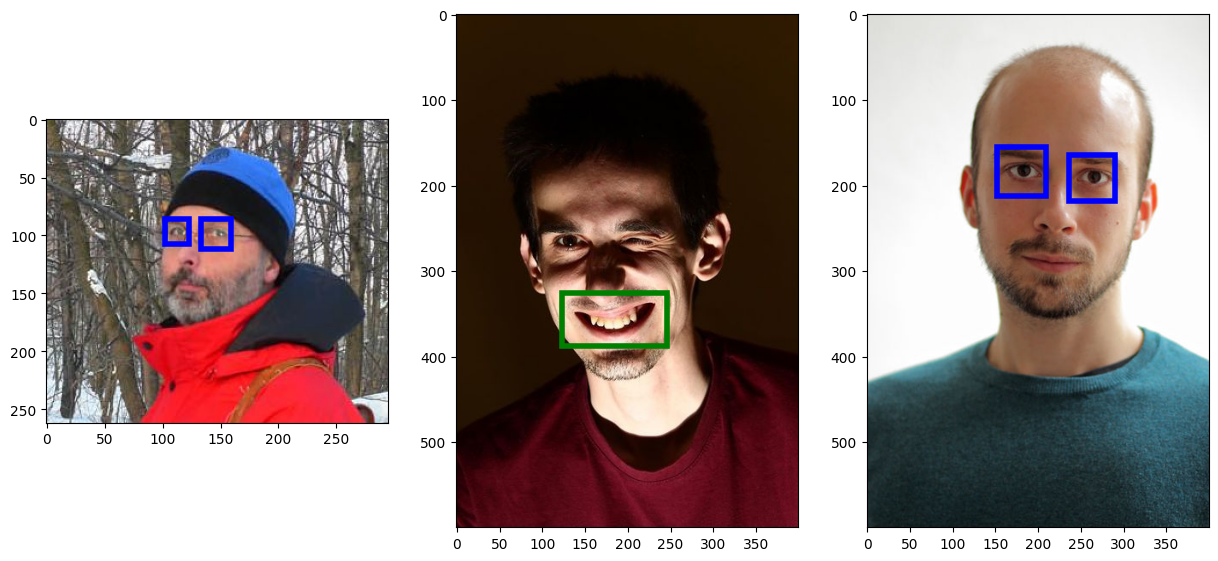

In [229]:
# capture frames from a camera
#cap = cv2.VideoCapture(0)
  
fig, ax = plt.subplots(1,3,figsize=(15, 9))
  
# reads frames from a camera
#ret, img = cap.read() 
imgs = [cv2.imread("DAI/big/Peter Borovansky.jpg"),
        cv2.imread("DAI/big/Vladimir Boza.jpg"),
        cv2.imread("DAI/big/Ivor Uhliarik.jpg")]
for i, img  in enumerate(imgs):
    print(img.shape)

    # convert to gray scale of each frames
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    img2 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    ax[i].imshow(img2)


    # Detects faces of different sizes in the input image
    faces = ()
    eyes = ()
    smiles = ()
    leftEyes = ()
    rightEyes = () 
    faces = face_cascade.detectMultiScale(gray, 
                                          scaleFactor = 1.1, 
                                          minNeighbors = 2) # 1 a 2 najde u Bora 2 tvare, 3+ nenajde Vlada
    eyes = eye_cascade.detectMultiScale(gray,
                                        scaleFactor = 1.3, 
                                        minNeighbors = 4) 
    smiles = smile_cascade.detectMultiScale(gray,
                                            scaleFactor = 1.85, 
                                            minNeighbors = 10)
    """
    leftEyes = lEye_cascade.detectMultiScale(gray,
                                             scaleFactor = 1.1, 
                                             minNeighbors = 10)
    rightEyes = rEye_cascade.detectMultiScale(gray,
                                              scaleFactor = 1.1, 
                                              minNeighbors = 10)
    """
    #print(faces)
    #print(eyes)
    #print(smiles)

    for (x,y,w,h) in faces:
        # To draw a rectangle in a face
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2) 
        ax[i].add_patch(Rectangle((x, y), w, h,
                               edgecolor='red',
                               facecolor='none',
                               lw=4))

    for (x,y,w,h) in eyes:
        # To draw a rectangle in a face
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2) 
        ax[i].add_patch(Rectangle((x, y), w, h,
                               edgecolor='blue',
                               facecolor='none',
                               lw=4))

    for (x,y,w,h) in smiles:
        # To draw a rectangle in a face
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2) 
        ax[i].add_patch(Rectangle((x, y), w, h,
                               edgecolor='green',
                               facecolor='none',
                               lw=4))
    
    """
    for (x,y,w,h) in leftEyes:
        # To draw a rectangle in a face
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2) 
        ax[i].add_patch(Rectangle((x, y), w, h,
                               edgecolor='pink',
                               facecolor='none',
                               lw=4))
    
    for (x,y,w,h) in rightEyes:
        # To draw a rectangle in a face
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2) 
        ax[i].add_patch(Rectangle((x, y), w, h,
                               edgecolor='yellow',
                               facecolor='none',
                               lw=4))
    """
    # hladanie oci v tvari
    """
    for (x,y,w,h) in faces:
        # To draw a rectangle in a face 
        ax[i].add_patch(Rectangle((x, y), w, h,
                                  edgecolor='black',
                                  facecolor='none',
                                  lw=2))
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
  
        # Detects eyes of different sizes in the input image
        eyes2 = eye_cascade.detectMultiScale(roi_gray,
                                             scaleFactor = 1.3, 
                                             minNeighbors = 4) 
  
        #To draw a rectangle in eyes
        for (ex,ey,ew,eh) in eyes2:
            ax[i].add_patch(Rectangle((x+ex, y+ey), ew, eh,
                                      edgecolor='white',
                                      facecolor='none',
                                      lw=2))
    """
    
#cv2.imshow('img',img)
plt.show()

  
# Close the window
#cap.release()
  
# De-allocate any associated memory usage
#cv2.destroyAllWindows() 